# Ridge Regression with Holdout: Gas Mileage Prediction
Annotated

      mpg  displacement  horsepower  weight  acceleration
0    18.0         307.0       130.0    3504          12.0
1    15.0         350.0       165.0    3693          11.5
2    18.0         318.0       150.0    3436          11.0
3    16.0         304.0       150.0    3433          12.0
4    17.0         302.0       140.0    3449          10.5
..    ...           ...         ...     ...           ...
393  27.0         140.0        86.0    2790          15.6
394  44.0          97.0        52.0    2130          24.6
395  32.0         135.0        84.0    2295          11.6
396  28.0         120.0        79.0    2625          18.6
397  31.0         119.0        82.0    2720          19.4

[392 rows x 5 columns]


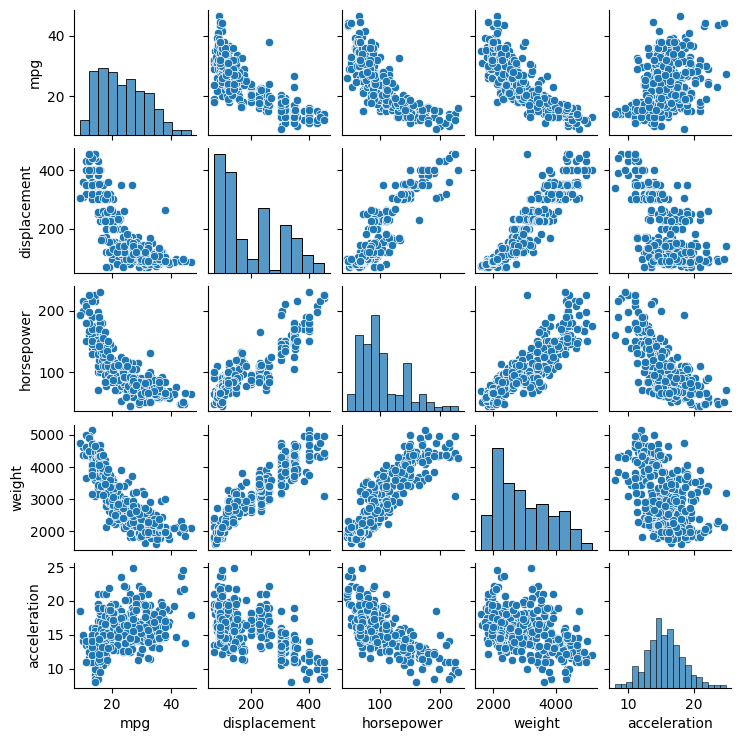

In [2]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import pandas for handling datasets
import seaborn as sns  # Import seaborn for data visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Import necessary machine learning tools from scikit-learn
from sklearn.linear_model import Ridge  # Ridge regression (L2-regularized linear regression)
from sklearn.pipeline import make_pipeline  # Utility for creating a pipeline of transformations and models
from sklearn.preprocessing import StandardScaler  # StandardScaler for normalizing data
from sklearn.model_selection import train_test_split  # Function for splitting data into training and testing sets

# Reference: Dataset used is from UCI Machine Learning Repository (Auto MPG dataset)
# Link: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

# Load the dataset into a pandas DataFrame
df = pd.read_csv("auto_mpg.csv")

# Drop specific columns from the dataset
df.drop(df.columns[[1, 6, 7, 8]], axis=1, inplace=True)  # Remove columns 1, 6, 7, and 8 (assumed discrete-valued features)

# Remove any rows with missing values to ensure data consistency
df.dropna(axis=0, inplace=True)

# Print the cleaned dataset
print(df)

# Create a pairplot using seaborn to visualize relationships between numerical features
sns.pairplot(df, height=1.5)

# Display the plot
plt.show()

Split the data into 70% training, 15% validation, and 15% testing.

In [3]:
# Extract the regressors (independent variables) and the target (dependent variable) from the DataFrame
x, y = df.iloc[:, 1:].to_numpy(), df.iloc[:, 0].to_numpy()
# x: All columns except the first one (features)
# y: First column (target variable)
# Convert both to NumPy arrays for easier numerical computations

# Split the dataset into training (70%) and a temporary set (30%) for validation & testing
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0)
# Further split the temporary set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
# The final data splits:
# - 70% Training set
# - 15% Validation set
# - 15% Test set

# Print the shapes to verify the dataset sizes
print(X_train.shape)  # Shape of training data
print(X_val.shape)    # Shape of validation data
print(X_test.shape)   # Shape of test data

# Initialize variables to track the best model parameters
max_R2 = 0  # Stores the highest validation R² score
best_alpha = 0  # Stores the best regularization parameter (alpha)
best_mdl = None  # Stores the best Ridge regression model

# Iterate over different values of the regularization parameter (alpha) for Ridge regression
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100]):
    # Create a pipeline that standardizes the data and applies Ridge regression
    mdl = make_pipeline(StandardScaler(), Ridge(alpha=alpha)).fit(X_train, y_train)

    print(f"Alpha: {alpha}")  # Print the current alpha value being tested

    # Compute R² scores for training and validation sets
    train_R2 = mdl.score(X_train, y_train)  # R² score on training data
    val_R2 = mdl.score(X_val, y_val)  # R² score on validation data

    # Print model parameters
    print(f"\tCoefficients: {mdl[1].coef_}")  # Ridge regression coefficients
    print(f"\tIntercept: {mdl[1].intercept_}")  # Intercept term
    print(f"\tTraining accuracy (R²): {train_R2}")  # R² score on training set
    print(f"\tValidation accuracy (R²): {val_R2}")  # R² score on validation set

    # Update the best model if the current validation R² is higher
    if val_R2 > max_R2:
        max_R2 = val_R2  # Update max validation R² score
        best_alpha = alpha  # Store the best alpha value
        best_mdl = mdl  # Store the best model

(274, 4)
(59, 4)
(59, 4)
Alpha: 0.0
	Coefficients: [-1.13119186 -1.18514945 -4.45320355 -0.02143731]
	Intercept: 23.16897810218978
	Training accuracy (R²): 0.7163772295250078
	Validation accuracy (R²): 0.7311232674499168
Alpha: 0.1
	Coefficients: [-1.13920777 -1.1888433  -4.44187774 -0.02378093]
	Intercept: 23.16897810218978
	Training accuracy (R²): 0.7163770067949723
	Validation accuracy (R²): 0.7311449733206559
Alpha: 0.5
	Coefficients: [-1.17020165 -1.20315672 -4.39789812 -0.0327753 ]
	Intercept: 23.16897810218978
	Training accuracy (R²): 0.7163719069815744
	Validation accuracy (R²): 0.7312265445875918
Alpha: 1.0
	Coefficients: [-1.20668383 -1.22007015 -4.34572296 -0.04321534]
	Intercept: 23.16897810218978
	Training accuracy (R²): 0.7163570699068773
	Validation accuracy (R²): 0.7313177469668661
Alpha: 5.0
	Coefficients: [-1.42988502 -1.32535156 -4.01375903 -0.1023958 ]
	Intercept: 23.16897810218978
	Training accuracy (R²): 0.7160307781509576
	Validation accuracy (R²): 0.731758623330

Best alpha: 10.0
Coefficients: [-1.60167334 -1.40918408 -3.73352704 -0.13865552]
Intercept: 23.16897810218978
Testing accuracy (R²) of Best Model: 0.6235892166451613


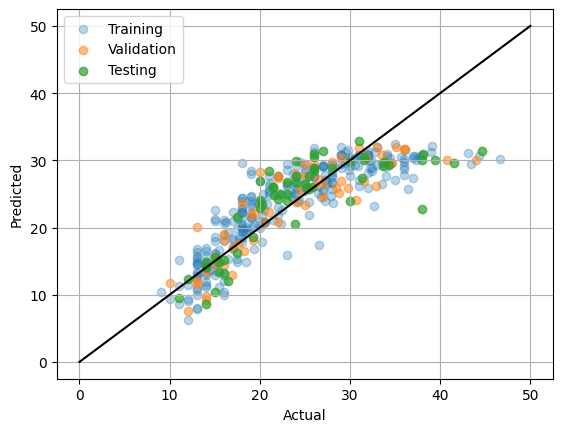

In [4]:
# Print the results of the best model found during hyperparameter tuning
print(f"Best alpha: {best_alpha}")  # Displays the best regularization parameter
print(f"Coefficients: {best_mdl[1].coef_}")  # Prints the best model's learned feature weights
print(f"Intercept: {best_mdl[1].intercept_}")  # Prints the intercept term of the best model

# Evaluate the best model on the test set
test_R2 = best_mdl.score(X_test, y_test)  # Compute the R² score on the test data
print(f"Testing accuracy (R²) of Best Model: {test_R2}")  # Display the test set performance

# Generate predictions for different sets
y_train_pred = best_mdl.predict(X_train)  # Predictions on training data
y_val_pred = best_mdl.predict(X_val)  # Predictions on validation data
y_test_pred = best_mdl.predict(X_test)  # Predictions on test data

# Plot the Actual vs. Predicted values
plt.plot(np.array([0, 50]), np.array([0, 50]), color='k', label='_nolegend_')  
# Draw a reference diagonal line (ideal prediction line: y = x)

plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")  # Training set predictions
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")  # Validation set predictions
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")  # Test set predictions

# Set axis labels
plt.xlabel('Actual')  # X-axis: Actual target values
plt.ylabel('Predicted')  # Y-axis: Predicted target values

plt.legend()  # Show legend for different sets
plt.grid()  # Add grid for better visualization
plt.show()  # Display the plot